## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  95.740846   357.793875  0.972279  4.845124  1.153602
1  47.833124   316.996758  0.671238  5.830484  1.078226
2  13.002264   515.616267  0.311825  6.987560  1.532209
3  31.433347  1638.076459  0.642584  3.138735  1.448208
4  14.996748  1733.332396  0.924777  5.565923  1.621972


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0058498	total: 56.8ms	remaining: 56.8s
1:	learn: 0.9956772	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9863049	total: 58.6ms	remaining: 19.5s
3:	learn: 0.9780757	total: 59.2ms	remaining: 14.7s
4:	learn: 0.9673625	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9589619	total: 60.1ms	remaining: 9.96s
6:	learn: 0.9489945	total: 60.5ms	remaining: 8.58s
7:	learn: 0.9376897	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9301653	total: 61.3ms	remaining: 6.75s
9:	learn: 0.9207583	total: 61.8ms	remaining: 6.12s
10:	learn: 0.9118041	total: 62.3ms	remaining: 5.6s
11:	learn: 0.9016410	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8932776	total: 63.3ms	remaining: 4.8s
13:	learn: 0.8846703	total: 63.7ms	remaining: 4.49s
14:	learn: 0.8763610	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8669185	total: 64.6ms	remaining: 3.97s
16:	learn: 0.8591000	total: 65.1ms	remaining: 3.76s
17:	learn: 0.8510199	total: 65.4ms	remaining: 3.57s
18:	learn: 0.8435124	total: 65.8ms	remaining: 

88:	learn: 0.4673890	total: 100ms	remaining: 1.03s
89:	learn: 0.4644564	total: 101ms	remaining: 1.02s
90:	learn: 0.4608394	total: 102ms	remaining: 1.01s
91:	learn: 0.4573629	total: 102ms	remaining: 1.01s
92:	learn: 0.4544623	total: 102ms	remaining: 999ms
93:	learn: 0.4511383	total: 103ms	remaining: 991ms
94:	learn: 0.4467217	total: 103ms	remaining: 984ms
95:	learn: 0.4434746	total: 104ms	remaining: 977ms
96:	learn: 0.4407508	total: 104ms	remaining: 968ms
97:	learn: 0.4371740	total: 104ms	remaining: 960ms
98:	learn: 0.4342728	total: 105ms	remaining: 953ms
99:	learn: 0.4316681	total: 105ms	remaining: 946ms
100:	learn: 0.4290956	total: 106ms	remaining: 940ms
101:	learn: 0.4259606	total: 106ms	remaining: 933ms
102:	learn: 0.4228759	total: 106ms	remaining: 926ms
103:	learn: 0.4195709	total: 107ms	remaining: 920ms
104:	learn: 0.4164436	total: 107ms	remaining: 912ms
105:	learn: 0.4141379	total: 107ms	remaining: 906ms
106:	learn: 0.4109368	total: 108ms	remaining: 902ms
107:	learn: 0.4085147	to

285:	learn: 0.1703384	total: 184ms	remaining: 460ms
286:	learn: 0.1697368	total: 185ms	remaining: 459ms
287:	learn: 0.1691206	total: 185ms	remaining: 457ms
288:	learn: 0.1685741	total: 185ms	remaining: 456ms
289:	learn: 0.1681608	total: 186ms	remaining: 454ms
290:	learn: 0.1675438	total: 186ms	remaining: 453ms
291:	learn: 0.1669561	total: 186ms	remaining: 451ms
292:	learn: 0.1664604	total: 187ms	remaining: 450ms
293:	learn: 0.1662609	total: 187ms	remaining: 450ms
294:	learn: 0.1657048	total: 188ms	remaining: 449ms
295:	learn: 0.1653519	total: 188ms	remaining: 448ms
296:	learn: 0.1648023	total: 189ms	remaining: 447ms
297:	learn: 0.1642129	total: 189ms	remaining: 445ms
298:	learn: 0.1635886	total: 189ms	remaining: 444ms
299:	learn: 0.1630876	total: 190ms	remaining: 442ms
300:	learn: 0.1624298	total: 190ms	remaining: 441ms
301:	learn: 0.1618082	total: 190ms	remaining: 440ms
302:	learn: 0.1611665	total: 190ms	remaining: 438ms
303:	learn: 0.1607942	total: 191ms	remaining: 436ms
304:	learn: 

502:	learn: 0.0879323	total: 281ms	remaining: 277ms
503:	learn: 0.0876196	total: 281ms	remaining: 277ms
504:	learn: 0.0873092	total: 282ms	remaining: 276ms
505:	learn: 0.0870024	total: 282ms	remaining: 276ms
506:	learn: 0.0867843	total: 283ms	remaining: 275ms
507:	learn: 0.0864673	total: 283ms	remaining: 274ms
508:	learn: 0.0862554	total: 284ms	remaining: 274ms
509:	learn: 0.0859629	total: 284ms	remaining: 273ms
510:	learn: 0.0855767	total: 284ms	remaining: 272ms
511:	learn: 0.0853691	total: 285ms	remaining: 271ms
512:	learn: 0.0849974	total: 285ms	remaining: 271ms
513:	learn: 0.0847942	total: 286ms	remaining: 270ms
514:	learn: 0.0844309	total: 286ms	remaining: 270ms
515:	learn: 0.0842952	total: 287ms	remaining: 269ms
516:	learn: 0.0839395	total: 287ms	remaining: 268ms
517:	learn: 0.0838068	total: 288ms	remaining: 268ms
518:	learn: 0.0834586	total: 288ms	remaining: 267ms
519:	learn: 0.0831527	total: 288ms	remaining: 266ms
520:	learn: 0.0829488	total: 289ms	remaining: 265ms
521:	learn: 

683:	learn: 0.0516119	total: 365ms	remaining: 169ms
684:	learn: 0.0515398	total: 366ms	remaining: 168ms
685:	learn: 0.0513695	total: 366ms	remaining: 168ms
686:	learn: 0.0512431	total: 366ms	remaining: 167ms
687:	learn: 0.0511393	total: 367ms	remaining: 166ms
688:	learn: 0.0510689	total: 367ms	remaining: 166ms
689:	learn: 0.0509171	total: 368ms	remaining: 165ms
690:	learn: 0.0508000	total: 368ms	remaining: 165ms
691:	learn: 0.0506595	total: 369ms	remaining: 164ms
692:	learn: 0.0506241	total: 370ms	remaining: 164ms
693:	learn: 0.0505428	total: 370ms	remaining: 163ms
694:	learn: 0.0504684	total: 370ms	remaining: 163ms
695:	learn: 0.0502685	total: 371ms	remaining: 162ms
696:	learn: 0.0502006	total: 371ms	remaining: 161ms
697:	learn: 0.0501217	total: 372ms	remaining: 161ms
698:	learn: 0.0500024	total: 373ms	remaining: 161ms
699:	learn: 0.0499247	total: 374ms	remaining: 160ms
700:	learn: 0.0497800	total: 375ms	remaining: 160ms
701:	learn: 0.0497034	total: 375ms	remaining: 159ms
702:	learn: 

876:	learn: 0.0330997	total: 461ms	remaining: 64.7ms
877:	learn: 0.0330446	total: 462ms	remaining: 64.2ms
878:	learn: 0.0329448	total: 463ms	remaining: 63.7ms
879:	learn: 0.0328773	total: 463ms	remaining: 63.2ms
880:	learn: 0.0328154	total: 464ms	remaining: 62.6ms
881:	learn: 0.0327107	total: 464ms	remaining: 62.1ms
882:	learn: 0.0326137	total: 465ms	remaining: 61.6ms
883:	learn: 0.0325243	total: 465ms	remaining: 61ms
884:	learn: 0.0324717	total: 466ms	remaining: 60.5ms
885:	learn: 0.0323769	total: 466ms	remaining: 60ms
886:	learn: 0.0323228	total: 467ms	remaining: 59.4ms
887:	learn: 0.0322730	total: 467ms	remaining: 58.9ms
888:	learn: 0.0321986	total: 467ms	remaining: 58.4ms
889:	learn: 0.0320685	total: 468ms	remaining: 57.8ms
890:	learn: 0.0319765	total: 468ms	remaining: 57.3ms
891:	learn: 0.0319242	total: 469ms	remaining: 56.8ms
892:	learn: 0.0318402	total: 470ms	remaining: 56.3ms
893:	learn: 0.0317921	total: 470ms	remaining: 55.7ms
894:	learn: 0.0316694	total: 471ms	remaining: 55.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

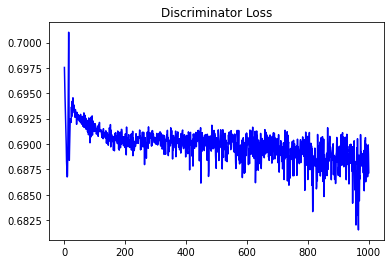

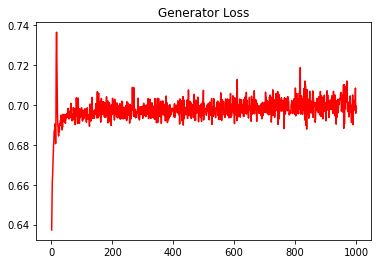

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14315098156350395


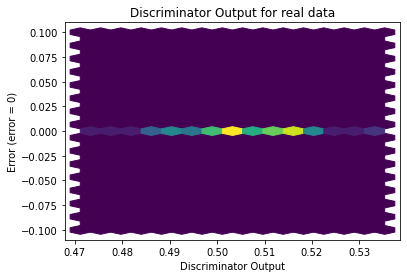

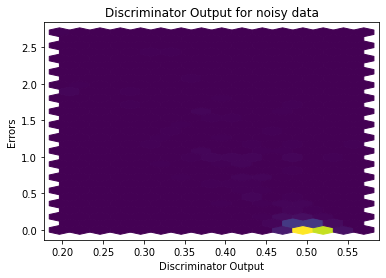

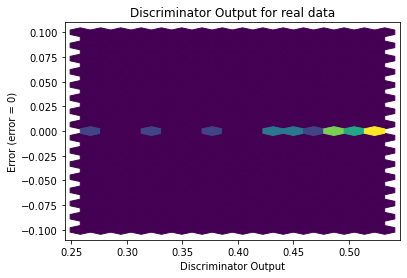

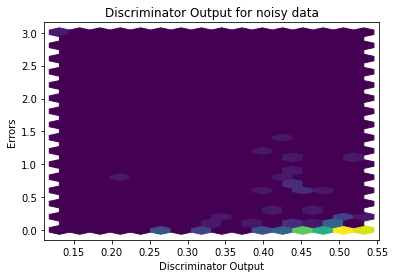

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


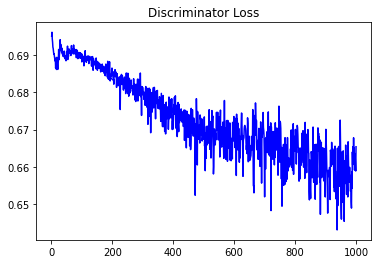

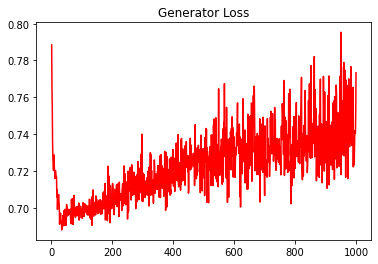

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22495828309155153


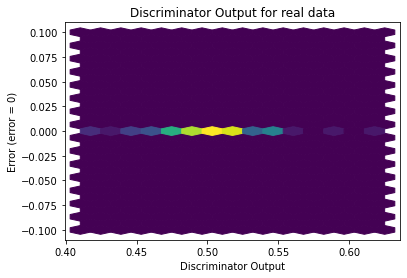

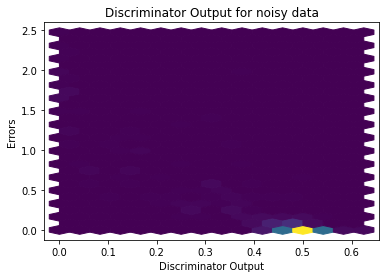

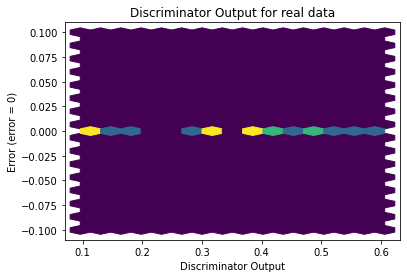

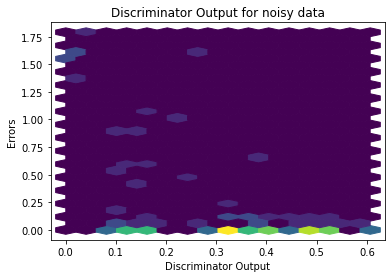

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2202]], requires_grad=True)
